# Step 1. Reading the data and labels to prepare df for modelling

In [1]:
import pandas as pd
# reading data file
data =  pd.read_csv("train.data", sep="\t")

In [2]:
# Convert data into dataframe

data = pd.DataFrame(data)

In [3]:
data

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,NaN,NaN,NaN,NaN,NaN,357.0,0.0,NaN,NaN,NaN,...,oslk,EROH7Cg,LM8l689qOp,NaN,NaN,7FJQ,RAYp,F2FyR07IdsN7I,NaN,NaN
49996,NaN,NaN,NaN,NaN,NaN,1078.0,0.0,NaN,NaN,NaN,...,oslk,GfSQowC,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,NaN
49997,NaN,NaN,NaN,NaN,NaN,2807.0,7.0,NaN,NaN,NaN,...,oslk,dh6qI2t,LM8l689qOp,NaN,ELof,fKCe,RAYp,TCU50_Yjmm6GIBZ0lL_,NaN,NaN
49998,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,oslk,2fF2Oqu,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN


In [4]:
# Reading labels file

import io
file_label = io.open("train_churn.labels.txt", mode="r", encoding="utf-8")

In [5]:
# Converting label file to dataframe and renaming the column header

df_label = pd.DataFrame(file_label, columns = ['output'])

In [6]:
df_label # It has a special character of new line along with each data point

,output
0,-1\n
1,1\n
2,-1\n
3,-1\n
4,-1\n
...,...
49995,-1\n
49996,-1\n
49997,-1\n
49998,-1\n


In [7]:
# Replacing the new line character

df_label = df_label['output'].str.replace('\n', '', regex=True)

In [8]:
# Checking distribution of output values

df_label.value_counts()

output
-1    46328
1      3672
Name: count, dtype: int64

In [9]:
# Concatenating the labels and data dataframes along column

df_data = pd.concat([data, df_label], axis=1)

In [10]:
# Checking the value distribution across numerical cols

df_data.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


Few columns seems to have just NaN values. We will investigate this and remove columns which have only NaNs or not much variation in the values

In [11]:
df_data.info() # Shows that there are 191 float type cols, 1 integer type col and 39 object type cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 231 entries, Var1 to output
dtypes: float64(191), int64(1), object(39)
memory usage: 88.1+ MB


In [12]:
# Checking shape of df

df_data.shape

(50000, 231)

# Step 2 - Cleaning the dataframe by checking column values and dropping the ones with static or null values

In [13]:
# checking # NaN in each col of dataframe

print(df_data.isna().sum().to_string())

Var1      49298
Var2      48759
Var3      48760
Var4      48421
Var5      48513
Var6       5529
Var7       5539
Var8      50000
Var9      49298
Var10     48513
Var11     48760
Var12     49442
Var13      5539
Var14     48760
Var15     50000
Var16     48513
Var17     48421
Var18     48421
Var19     48421
Var20     50000
Var21      5529
Var22      5009
Var23     48513
Var24      7230
Var25      5009
Var26     48513
Var27     48513
Var28      5011
Var29     49298
Var30     49298
Var31     50000
Var32     50000
Var33     49153
Var34     48759
Var35      5009
Var36     48759
Var37     48421
Var38      5009
Var39     50000
Var40     48759
Var41     49298
Var42     50000
Var43     48759
Var44      5009
Var45     49656
Var46     48759
Var47     49298
Var48     50000
Var49     48759
Var50     49298
Var51     46253
Var52     50000
Var53     49298
Var54     48759
Var55     50000
Var56     49354
Var57         0
Var58     49298
Var59     49180
Var60     48513
Var61     49153
Var62     49442
Var63   

In [14]:
# dropping columns containing more than 30% NaN

def drop_na(df):
    df.dropna(axis=1, thresh=len(df)*0.70, inplace = True)
    return df

df_data = drop_na(df_data)

In [15]:
df_data.shape

(50000, 68)

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    44471 non-null  float64
 1   Var7    44461 non-null  float64
 2   Var13   44461 non-null  float64
 3   Var21   44471 non-null  float64
 4   Var22   44991 non-null  float64
 5   Var24   42770 non-null  float64
 6   Var25   44991 non-null  float64
 7   Var28   44989 non-null  float64
 8   Var35   44991 non-null  float64
 9   Var38   44991 non-null  float64
 10  Var44   44991 non-null  float64
 11  Var57   50000 non-null  float64
 12  Var65   44461 non-null  float64
 13  Var73   50000 non-null  int64  
 14  Var74   44461 non-null  float64
 15  Var76   44991 non-null  float64
 16  Var78   44991 non-null  float64
 17  Var81   44471 non-null  float64
 18  Var83   44991 non-null  float64
 19  Var85   44991 non-null  float64
 20  Var109  42770 non-null  float64
 21  Var112  44991 non-null  float64
 22

In [17]:
# Replacing NaN with '0' in case of object type columns and with mean per output category for numerical columns

def df_fillna(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = df[i].fillna('0')
        else:
            df[i] = df_data[i].fillna(df_data.groupby('output')[i].transform('mean')) # replacing with mean per output category
    return df

df_data = df_fillna(df_data)

In [18]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    50000 non-null  float64
 1   Var7    50000 non-null  float64
 2   Var13   50000 non-null  float64
 3   Var21   50000 non-null  float64
 4   Var22   50000 non-null  float64
 5   Var24   50000 non-null  float64
 6   Var25   50000 non-null  float64
 7   Var28   50000 non-null  float64
 8   Var35   50000 non-null  float64
 9   Var38   50000 non-null  float64
 10  Var44   50000 non-null  float64
 11  Var57   50000 non-null  float64
 12  Var65   50000 non-null  float64
 13  Var73   50000 non-null  int64  
 14  Var74   50000 non-null  float64
 15  Var76   50000 non-null  float64
 16  Var78   50000 non-null  float64
 17  Var81   50000 non-null  float64
 18  Var83   50000 non-null  float64
 19  Var85   50000 non-null  float64
 20  Var109  50000 non-null  float64
 21  Var112  50000 non-null  float64
 22


1.   Below step for dropping duplicate features and dropping features with constant values has been commented since SMOTE required version 1.2.2 of scikit-learn but feature-engine was not compatible with it.
2.   Moreover I could see that there was no impact of using DropDuplicateFeatures, DropConstantFeatures on the dataframe and therefore decided to comment it



In [19]:
# from sklearn.pipeline import Pipeline # helps orchestrate multiple operations using single call
# from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures # Pre defined functions to remove duplicates and constant features

In [20]:
# pipe_clean = Pipeline([('constant', DropConstantFeatures(tol = 0.998)), # Threshold to detect constant/quasi-constant features. Here it will remove features having same value in 99.8% of the observations
#                 ('duplicated', DropDuplicateFeatures())])

In [21]:
# df_cleaned = pipe_clean.fit_transform(df_data)

In [22]:
# df_cleaned.shape # We are sure that we do not have any duplicate columns or columns with static value

## Step 3 - Carrying out EDA to understand correlation between feature variables and dsitribution w.r.t Output variable

In [23]:
df_cleaned = df_data
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    50000 non-null  float64
 1   Var7    50000 non-null  float64
 2   Var13   50000 non-null  float64
 3   Var21   50000 non-null  float64
 4   Var22   50000 non-null  float64
 5   Var24   50000 non-null  float64
 6   Var25   50000 non-null  float64
 7   Var28   50000 non-null  float64
 8   Var35   50000 non-null  float64
 9   Var38   50000 non-null  float64
 10  Var44   50000 non-null  float64
 11  Var57   50000 non-null  float64
 12  Var65   50000 non-null  float64
 13  Var73   50000 non-null  int64  
 14  Var74   50000 non-null  float64
 15  Var76   50000 non-null  float64
 16  Var78   50000 non-null  float64
 17  Var81   50000 non-null  float64
 18  Var83   50000 non-null  float64
 19  Var85   50000 non-null  float64
 20  Var109  50000 non-null  float64
 21  Var112  50000 non-null  float64
 22

In [24]:
# import modules for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

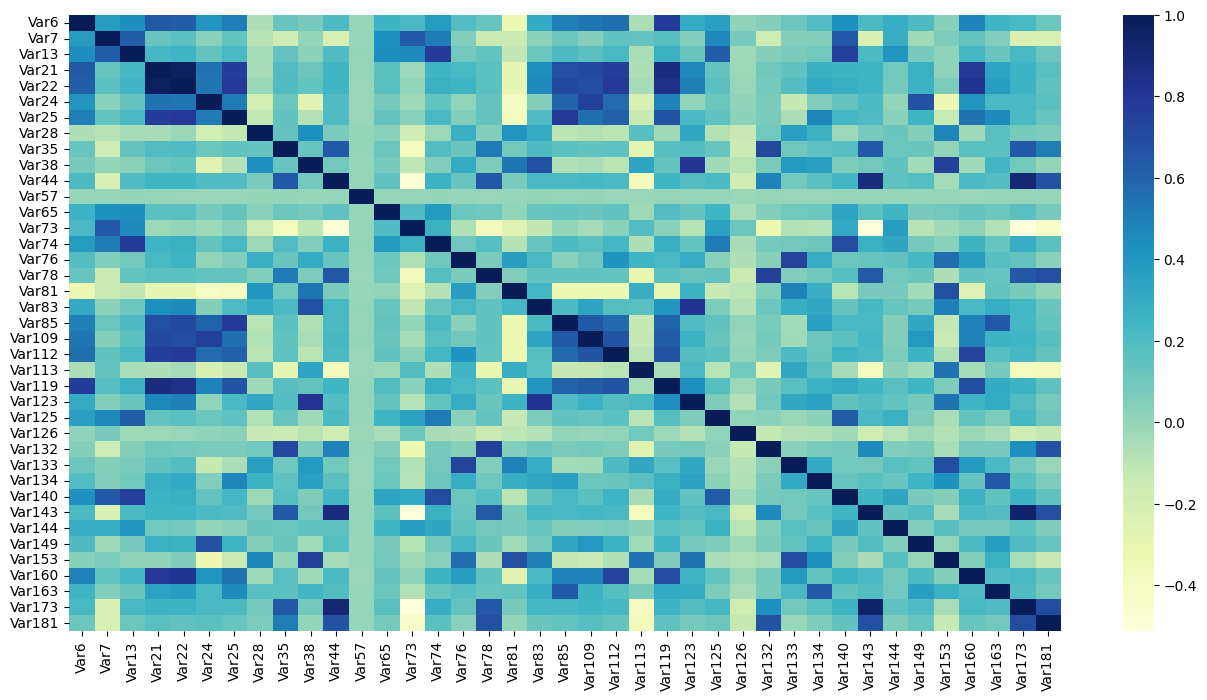

In [25]:
# Checking existence of correlation amongst numerical columns

plt.figure(figsize=(16, 8))
# plotting correlation heatmap
dataplot = sns.heatmap(df_cleaned.corr(numeric_only = True, method = 'spearman'), cmap="YlGnBu", annot=False)
# displaying heatmap
plt.show()

Apparently correlation exists among a few numeric variables. We will drop the highly correlated columns (80% or more) and keep just one amongst them in the next section.

In [26]:
# setting option to view all the object type cols at once

pd.set_option('display.max_columns', None)

In [27]:
# .describe for object type cols

df_cleaned.describe(include = 'object')

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228,output
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,362,51,23,4,226,4291,5074,5714,6,100,4,22,14,3,6,2,81,2016,13991,3,23,4291,7,4291,5,23,7,30,2
top,qFpmfo8zhV,RO12,taul,1K8T,0Xwj,fhk21Ss,r83_sZi,nyZz,9_Y1,RVjC,VpdQ,IYzP,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,mAjbk_S,0,cJvF,FzaX,4UxGlow,oslk,catzS2D,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I,-1
freq,385,35964,47958,49550,4629,4441,955,198,45233,1819,31962,17274,35079,46022,47570,40299,29303,4937,703,25319,40304,4441,37009,4441,36608,8031,35156,32703,46328


1. Variables - Var196, Var203, Var208 Var210, Var 211 seem to be highly
skewed with the top category having more than 80% presence

2. We will need to use synthetic data augmentation to balance the classes in output variable

3. Variables - Var192, Var197, Var198, Var199, Var202, Var204, Var212, Var216, Var217, Var220, Var222, Var226 and Var228 seem to have a very high cardinality. Few of them again seem to be skewed towards a top few categories



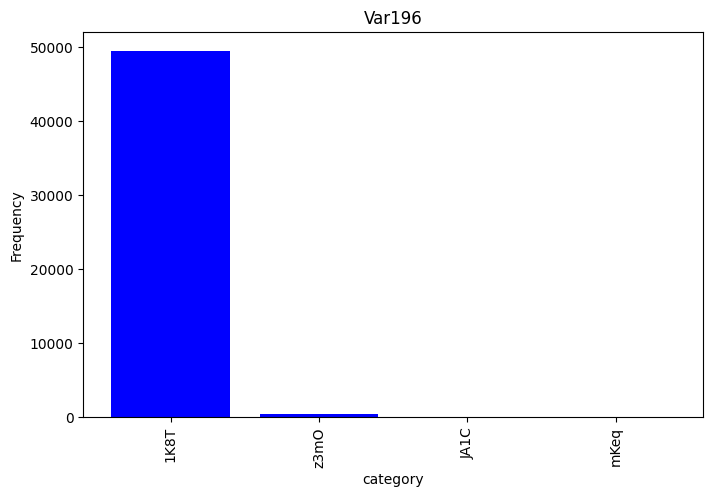

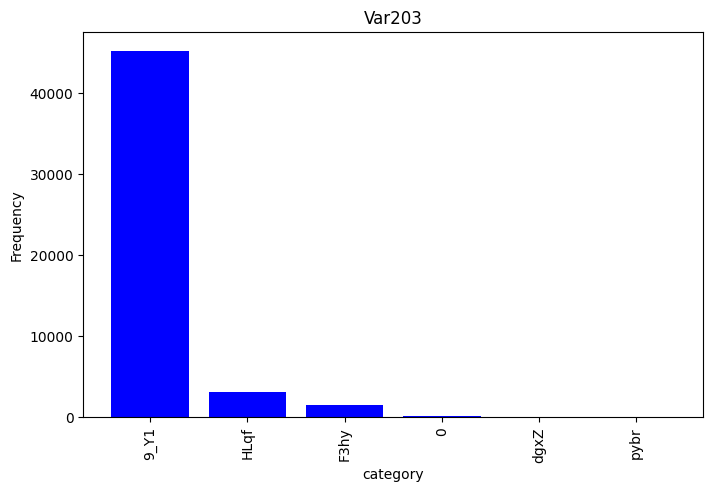

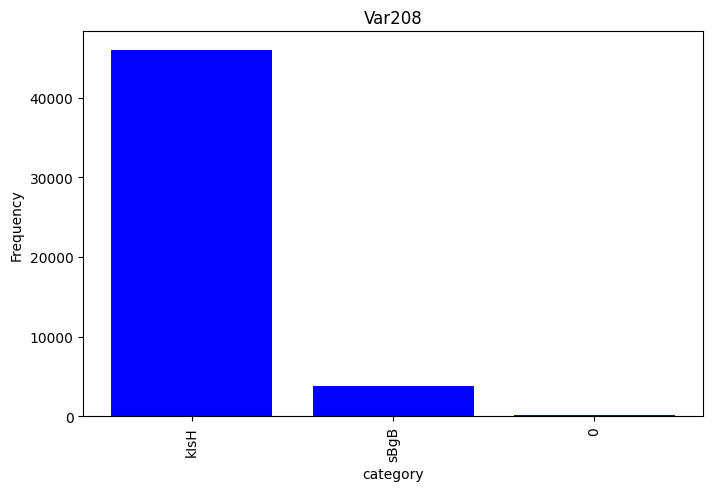

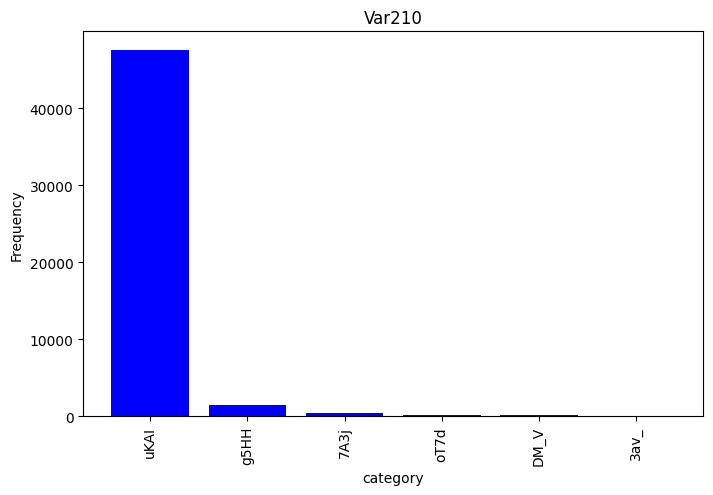

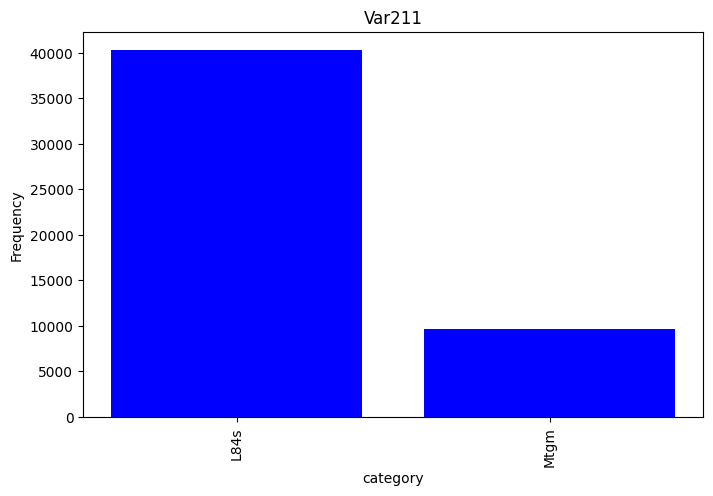

In [28]:
# For the above identified skewed columns (point 1) plotting a bar plot to check distribution

for cols in ['Var196', 'Var203', 'Var208', 'Var210', 'Var211']:
    categories = df_cleaned[cols].value_counts().keys()
    counts = df_cleaned[cols].value_counts().values
    plt.subplots(figsize=(8, 5))
    plt.bar(categories, counts, color="blue")
    plt.xlabel("category")
    plt.ylabel("Frequency")
    plt.xticks(fontsize = 10, rotation = 90)
    plt.title(cols)
    plt.show()

Given the distribution skewness we will drop columns - Var196, Var203, Var208 and Var210

In [29]:
# creating frequency distribution table for object type variables with high cardinality (point 3)

def frequency_table(data:pd.DataFrame, col:str, column:str):
    freq_table = pd.crosstab(index=data[col], columns=data[column], margins=True)
    rel_table = round(freq_table/freq_table.loc["All"], 2)
    return freq_table, rel_table

In [30]:
for cols in ['Var192', 'Var197', 'Var198', 'Var199', 'Var202', 'Var204', 'Var212', 'Var216', 'Var217', 'Var220', 'Var222', 'Var226', 'Var228']:

    occurence_freq, _ = frequency_table(df_cleaned, cols, "output")
    print('---------------', cols, '---------------')
    print("Two-way relative frequency table")
    print(occurence_freq)


--------------- Var192 ---------------
Two-way relative frequency table
output         -1     1    All
Var192                        
0             310    59    369
0G9vyxdMWg      1     0      1
0kQTmBU3gb      1     0      1
0kQqrQsiZt      1     0      1
0vimfo8zhV    309    26    335
...           ...   ...    ...
zKnrjIPxRp      0     1      1
zcROj17IEC    298    20    318
zcROj1KVEH     69     5     74
zcRZptzip9    225    17    242
All         46328  3672  50000

[363 rows x 3 columns]
--------------- Var197 ---------------
Two-way relative frequency table
output     -1     1    All
Var197                    
0         137     6    143
0LaQ      113     9    122
0WHw      197    16    213
0Xwj     4243   386   4629
0Y9G      381    28    409
...       ...   ...    ...
z32l      883    56    939
z72i        2     0      2
z8at       35     2     37
zcPU       10     0     10
All     46328  3672  50000

[227 rows x 3 columns]
--------------- Var198 ---------------
Two-way relativ

Barring Var228 and Var226 we need a further drill down to understand the distribution across categores within each of the above variable

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


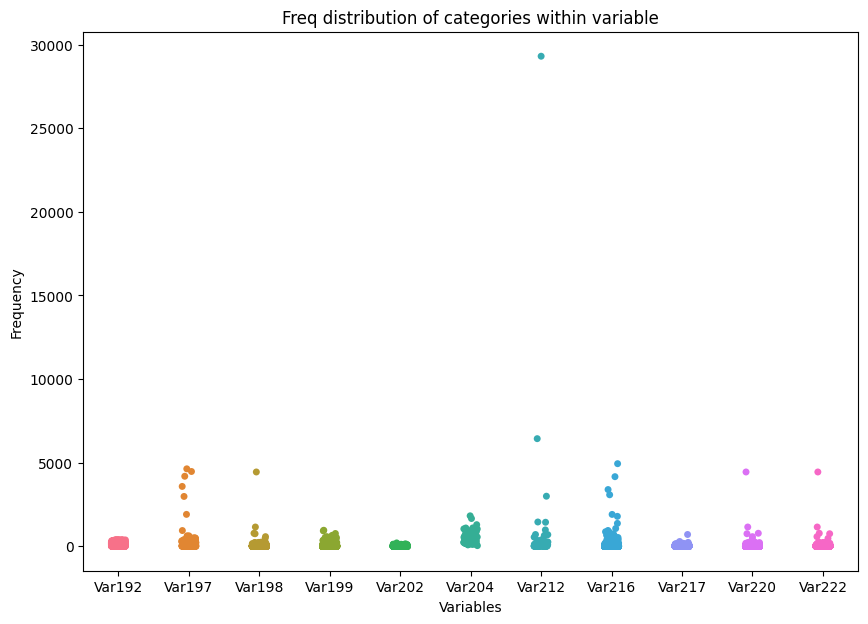

In [31]:
# Checking the spread of frequency of different categories in the object cols

dict_freq = {}

for cols in ['Var192', 'Var197', 'Var198', 'Var199', 'Var202', 'Var204', 'Var212', 'Var216', 'Var217', 'Var220', 'Var222']:
    dict_freq[cols] = df_cleaned[cols].value_counts().values

plt.subplots(figsize=(10, 7))
sns.stripplot(data = dict_freq)
plt.title("Freq distribution of categories within variable")
plt.ylabel("Frequency")
plt.xlabel("Variables")
plt.show()

In [32]:
# checking Var212 separately

df_cleaned['Var212'].value_counts()

Var212
NhsEn4L                29303
XfqtO3UdzaXh_           6433
CrNX                    2992
Ie_5MZs                 1450
FMSzZ91zL2              1435
                       ...  
EtT4fc6                    1
spA2krzLD1PDW              1
Bu_1wtkK7soonSbWUd_        1
zz1zifk                    1
1OjWUjS                    1
Name: count, Length: 81, dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


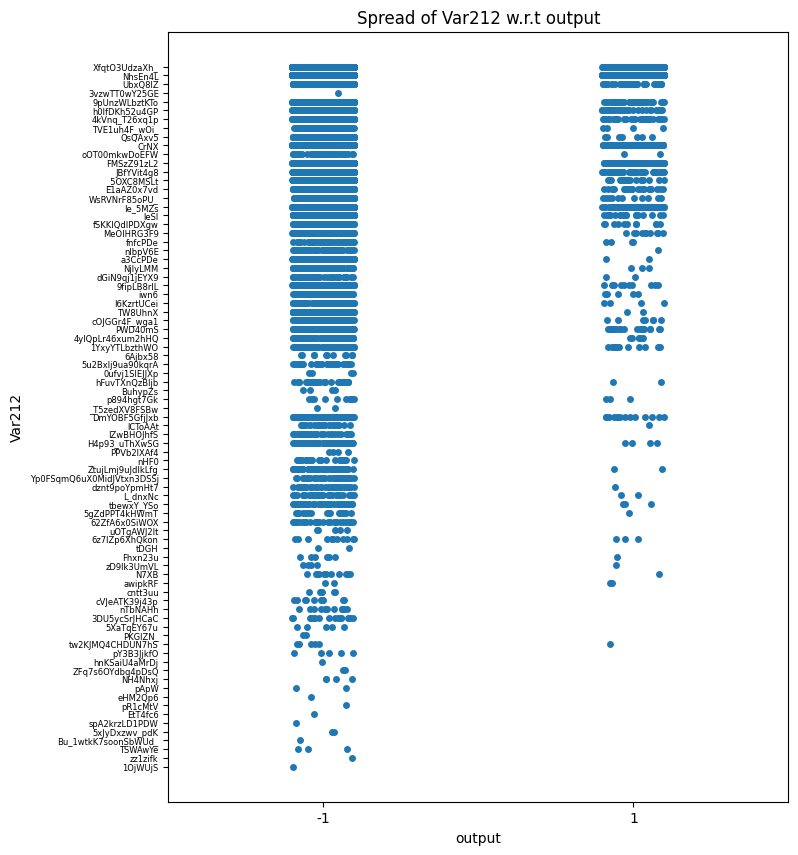

In [33]:
# Plotting scatter plot for checking distribution w.r.t output variable

plt.subplots(figsize=(8, 10))
sns.stripplot(y = df_cleaned['Var212'], x = df_cleaned['output'])
plt.xlabel("output")
plt.ylabel("Var212")
plt.yticks(fontsize = 6)
plt.title('Spread of Var212 w.r.t output')
plt.show()

Although Var212 has one category which skews the entire distribution but its distribution is uniform across the output variable.
We will leave it untouched as there is considerable presence of other factors too

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


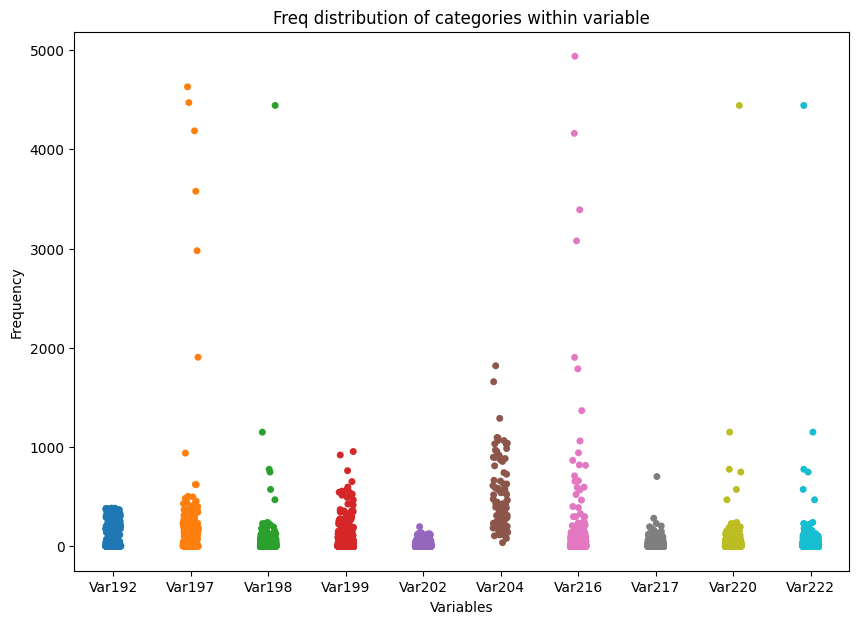

In [34]:
# Re-plotting after removing Var212

dict_freq = {}

for cols in ['Var192', 'Var197', 'Var198', 'Var199', 'Var202', 'Var204', 'Var216', 'Var217', 'Var220', 'Var222']:
    dict_freq[cols] = df_cleaned[cols].value_counts().values

plt.subplots(figsize=(10, 7))
sns.stripplot(data = dict_freq)
plt.title("Freq distribution of categories within variable")
plt.ylabel("Frequency")
plt.xlabel("Variables")
plt.show()

From above we can see that columns - 'Var197', 'Var198', 'Var216', 'Var220', 'Var222' have high number of category with below 500 occurence.

In [35]:
# Using Mutual Info to check contribution of numerical variables towards output variable

from sklearn.feature_selection import mutual_info_classif

mif = mutual_info_classif(df_cleaned.select_dtypes(exclude = 'object'), df_cleaned['output'])
[" ".join(item) for item in zip(df_cleaned.columns, mif.astype('str'))]

['Var6 0.023699202407705844',
 'Var7 0.03049226733851973',
 'Var13 0.025960184464915548',
 'Var21 0.023677607798175515',
 'Var22 0.020382221358912433',
 'Var24 0.03733180939578862',
 'Var25 0.02001849030779934',
 'Var28 0.023256239584414473',
 'Var35 0.01902793873200359',
 'Var38 0.01884705303451506',
 'Var44 0.018158680880128175',
 'Var57 0.0009514069925706803',
 'Var65 0.026643132476557474',
 'Var73 0.005255702435301712',
 'Var74 0.02909754694897071',
 'Var76 0.020874811329879117',
 'Var78 0.018371785531509977',
 'Var81 0.025303082964261536',
 'Var83 0.018462754866331865',
 'Var85 0.019234075913493687',
 'Var109 0.03566058671210226',
 'Var112 0.020244526715060385',
 'Var113 0.004255402482495008',
 'Var119 0.022825828382838864',
 'Var123 0.020003744345923336',
 'Var125 0.025987194155320692',
 'Var126 0.11046468730254633',
 'Var132 0.02028704694137229',
 'Var133 0.020708593620895943',
 'Var134 0.020872681100621016',
 'Var140 0.02650940337403207',
 'Var143 0.018712170918578908',
 'Var14

Mutual Information values seem to be low 'Var57', 'Var73', and 'Var113'.

We will add more features by taking a ratio of the existing numerical variables

In [36]:
# Feature engineering - taking ratio of available 3 numerical cols to create additional features

df_cleaned['feature_engg_1_2'] = df_cleaned['Var57'] / (df_cleaned['Var73'] + 0.01)
df_cleaned['feature_engg_1_3'] = df_cleaned['Var57'] / (df_cleaned['Var113']+ 0.01)
df_cleaned['feature_engg_2_3'] = df_cleaned['Var73'] / (df_cleaned['Var113']+ 0.01)

In [37]:
df_cleaned.select_dtypes(exclude = 'object').iloc[:,-3:].columns

Index(['feature_engg_1_2', 'feature_engg_1_3', 'feature_engg_2_3'], dtype='object')

In [38]:
# Checing the mutual info value for the additional numerical features added

mutual_info_classif(df_cleaned.select_dtypes(exclude = 'object').iloc[:,-3:], df_cleaned['output'])

array([3.05432458e-03, 9.88349554e-05, 1.87445797e-03])

# Step 4 - Feature selection based on the results in EDA

There is not much contribution from the feature engineered columns. Therefore dropping these three new columns along with 'Var57', 'Var73', and 'Var113'.

In [39]:
df_cleaned.drop(columns = ['Var57', 'Var73', 'Var113', 'feature_engg_1_2', 'feature_engg_1_3', 'feature_engg_2_3'], axis = 1, inplace = True)

In [40]:
#Dropping categorical columns as identified before - Var196, Var203, Var208, Var210

df_cleaned.drop(columns = ['Var196', 'Var203', 'Var208', 'Var210'], axis = 1, inplace = True)

In [41]:
# Converting output variable to numerical

df_cleaned['output'] = df_cleaned['output'].astype(int)

In [42]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Var6    50000 non-null  float64
 1   Var7    50000 non-null  float64
 2   Var13   50000 non-null  float64
 3   Var21   50000 non-null  float64
 4   Var22   50000 non-null  float64
 5   Var24   50000 non-null  float64
 6   Var25   50000 non-null  float64
 7   Var28   50000 non-null  float64
 8   Var35   50000 non-null  float64
 9   Var38   50000 non-null  float64
 10  Var44   50000 non-null  float64
 11  Var65   50000 non-null  float64
 12  Var74   50000 non-null  float64
 13  Var76   50000 non-null  float64
 14  Var78   50000 non-null  float64
 15  Var81   50000 non-null  float64
 16  Var83   50000 non-null  float64
 17  Var85   50000 non-null  float64
 18  Var109  50000 non-null  float64
 19  Var112  50000 non-null  float64
 20  Var119  50000 non-null  float64
 21  Var123  50000 non-null  float64
 22

# Step 5- Building model to train and test on the given data using 10 cross-fold validation WITHOUT label encoding of categorical variables

In [43]:
# splitting data in stratified manner into train and test

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)

X = df_cleaned.drop('output', axis = 1) # Independent variables
y = df_cleaned['output'] # Dependent variable

In [44]:
# CatBoost has the ability to deal with cateogrical features without requiring any encoding
# Therefore, this makes our first choice of model to quickly analyze the prediction performance over given data

!pip install catboost

In [45]:
# Importing relevant lib

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score

In [46]:
X.select_dtypes(include = 'object').columns

Index(['Var192', 'Var193', 'Var195', 'Var197', 'Var198', 'Var199', 'Var202',
       'Var204', 'Var205', 'Var206', 'Var207', 'Var211', 'Var212', 'Var216',
       'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223',
       'Var226', 'Var227', 'Var228'],
      dtype='object')

In [47]:
# Storing list of all the object type variables

categorical_features = ['Var192', 'Var193', 'Var195', 'Var197', 'Var198', 'Var199', 'Var202', 'Var204', 'Var205', 'Var206','Var207', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var226', 'Var227', 'Var228']

In [48]:
skf.get_n_splits(X, y) # gets us 10 splits as part of K-fold

# running the loop through all the splits

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    # splitting train test for 10 stratified folds
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

    # model initializer
    model = CatBoostClassifier(iterations=100,
                               depth=8,
                               learning_rate=0.05,
                               cat_features=categorical_features,
                               loss_function='Logloss',
                               custom_metric=['AUC'],
                               random_seed=42,
                               use_best_model=True,
                               early_stopping_rounds=5)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), verbose = False, plot = True)

    # prediting on test set
    y_pred=model.predict(X_test)

    # Calculate the accuracy on test set
    accuracy=accuracy_score(y_pred, y_test)
    print('\n')
    print('k-fold count: {0:0}'.format(i) )
    print('CatBoost Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

    # Calculate the accuracy on train set to detect overfitting
    y_pred_train = model.predict(X_train)
    print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
# Checking model fit
print('Is Model fitted (T/F)?: ' + str(model.is_fitted()))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 0
CatBoost Model accuracy score: 0.9648
Training-set accuracy score: 0.9648


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 1
CatBoost Model accuracy score: 0.9646
Training-set accuracy score: 0.9649


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 2
CatBoost Model accuracy score: 0.9666
Training-set accuracy score: 0.9647


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 3
CatBoost Model accuracy score: 0.9648
Training-set accuracy score: 0.9647


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 4
CatBoost Model accuracy score: 0.9606
Training-set accuracy score: 0.9649


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 5
CatBoost Model accuracy score: 0.9632
Training-set accuracy score: 0.9648


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 6
CatBoost Model accuracy score: 0.9662
Training-set accuracy score: 0.9646


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 7
CatBoost Model accuracy score: 0.9626
Training-set accuracy score: 0.9651


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 8
CatBoost Model accuracy score: 0.9646
Training-set accuracy score: 0.9647


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))



k-fold count: 9
CatBoost Model accuracy score: 0.9624
Training-set accuracy score: 0.9652
Is Model fitted (T/F)?: True


Since the data has class imbalance so high accuracy scores should not be relied upon right away.
Although overfitting is not happening as both the test and train set accuracy scores are closeby.

In [49]:
# Checking feature importance using inbuilt function of Catboost

model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,Var126,67.123668
1,Var149,3.417248
2,Var7,2.709325
3,Var153,2.572952
4,Var173,2.169656
5,Var22,1.653096
6,Var216,1.493878
7,Var218,1.462740
8,Var199,1.431257
9,Var44,1.314593


For our next model iteration we can choose to leave out 'Var198', 'Var217', 'Var220' and 'Var222'

In [50]:
# Checking feature importance using SHAP values

!pip install shap

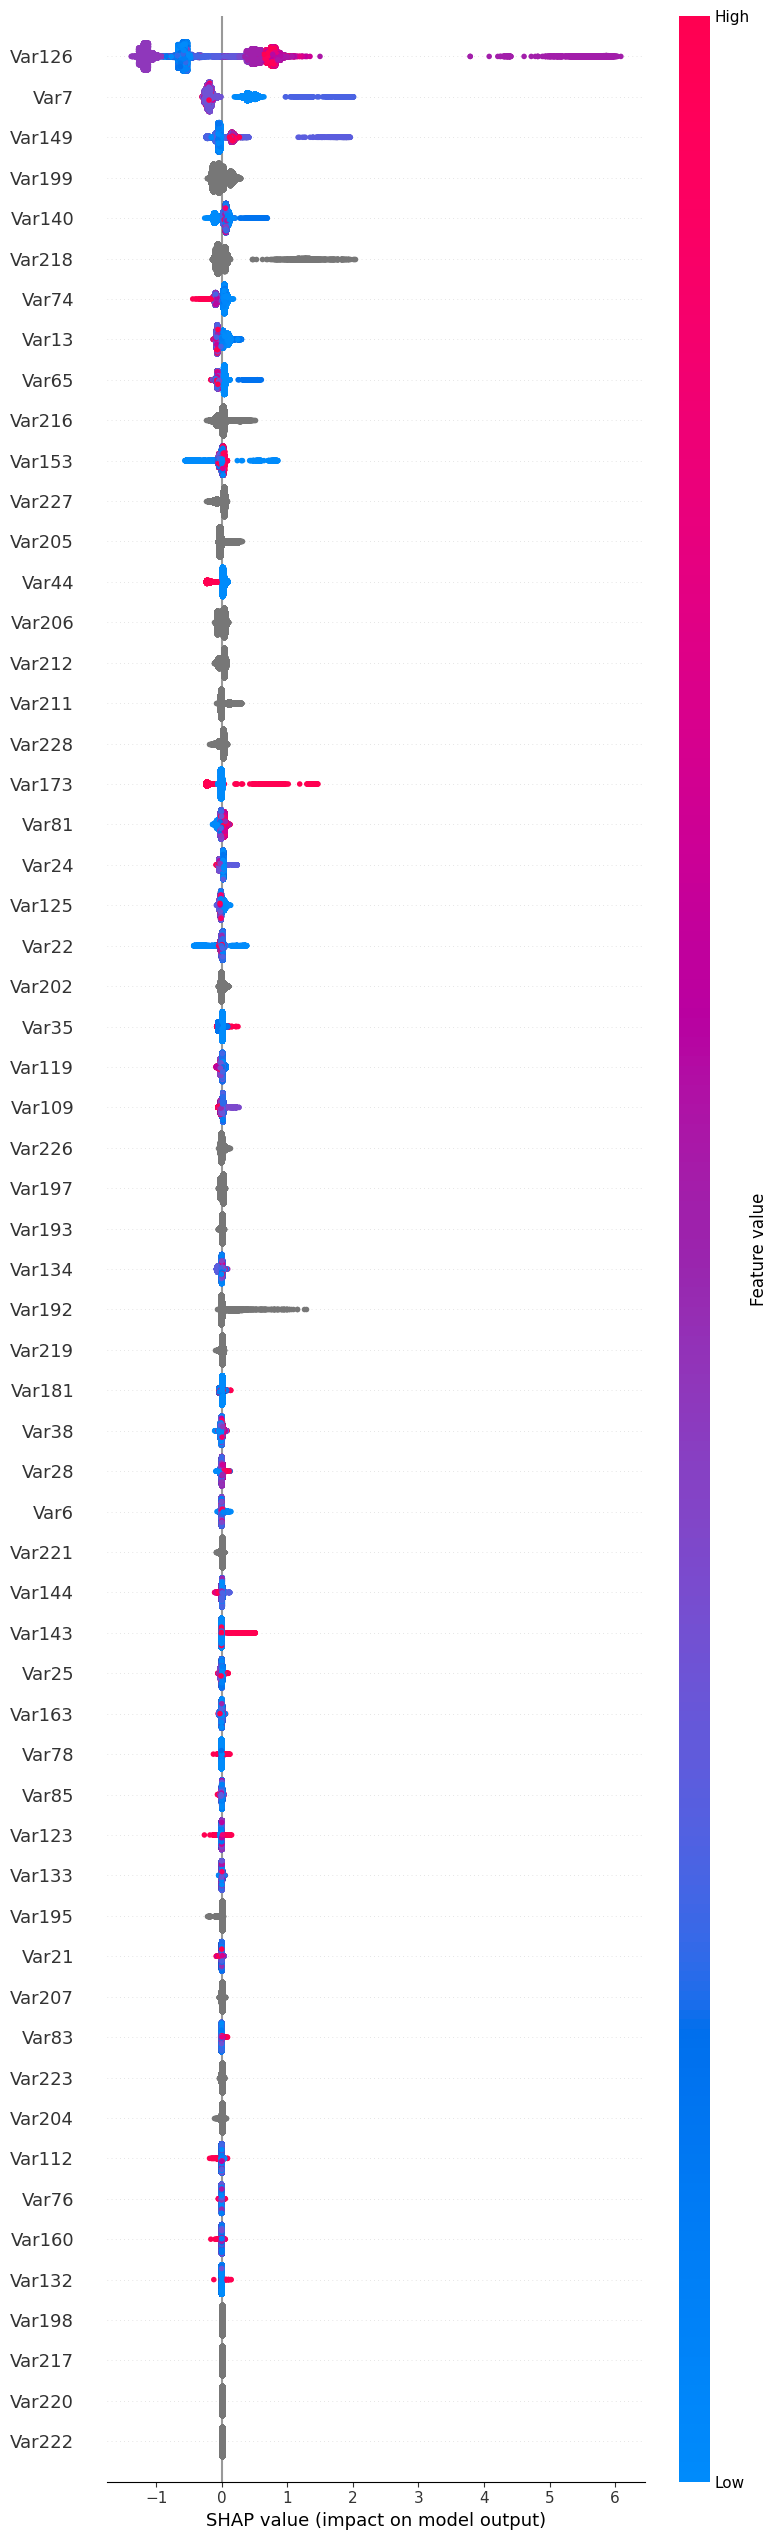

In [51]:
import shap

shap.initjs()
pool1 = Pool(data=X, label=y, cat_features=categorical_features) # Pool is a function under catboost and is used to provide inputs of df
shap_values = model.get_feature_importance(pool1, type='ShapValues')
shap.summary_plot(shap_values[:,:-1], X, max_display=X.shape[1]) # using maz_display as there are more than 20 features

SHAP confirms the results obtained from catboost feature importance for the least impactful variables.

Please note that the impact of object type features has been show in grey color because the high/low values cannot be color coded for them.

# Step 6 - Publishing error metrics on validation/test data

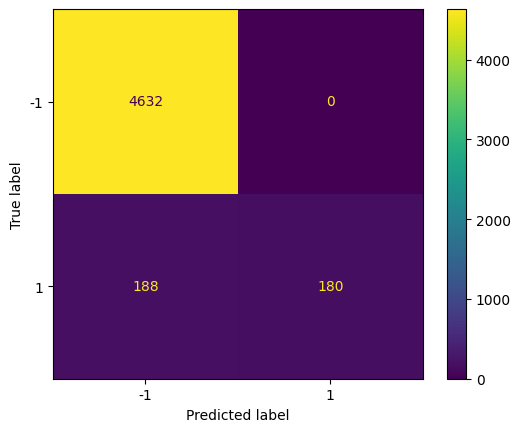

In [52]:
import sklearn
from sklearn import metrics

# Plotting confusion matrix to determine class level prediction accuracy

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [-1, 1])
cm_display.plot()
plt.show()

In [53]:
from sklearn.metrics import classification_report

In [54]:
# Calculate precision, recall, and F1 score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98      4632
           1       1.00      0.49      0.66       368

    accuracy                           0.96      5000
   macro avg       0.98      0.74      0.82      5000
weighted avg       0.96      0.96      0.96      5000



Model has high overall accuracy of 96% because of high precision and recall in majority class. For minority class although the precision is 1 while recall is poor given low support. F1 score is skewed due toware majority class

In [55]:
# Plot FPR and FNR Curve to assess the threshold values

from catboost.utils import get_roc_curve, get_fpr_curve, get_fnr_curve

eval_pool = Pool(X_test, y_test, cat_features=categorical_features)
curve = get_roc_curve(model, eval_pool)

(thresholds, fpr) = get_fpr_curve(curve=curve)
(thresholds, fnr) = get_fnr_curve(curve=curve)

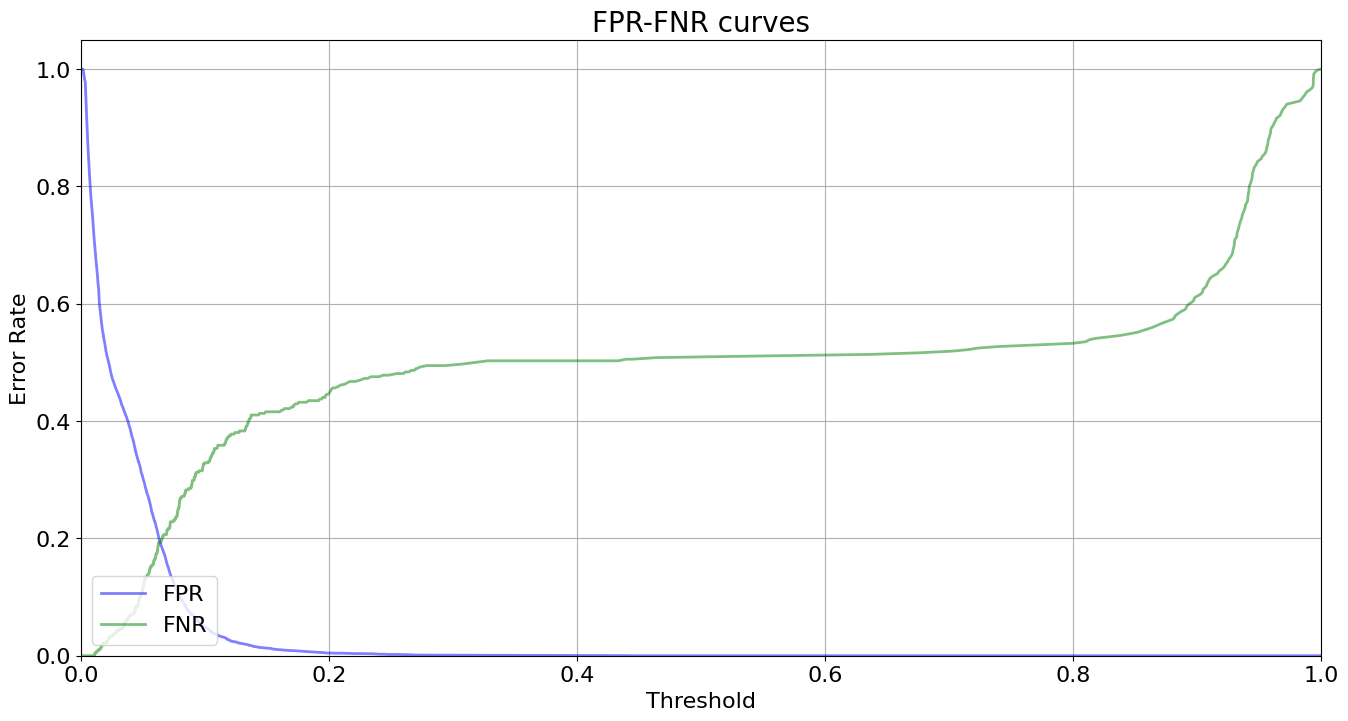

In [56]:
# Took this code snippet as it is from CatBoost documentation

plt.figure(figsize=(16, 8))
lw = 2

plt.plot(thresholds, fpr, color='blue', lw=lw, label='FPR', alpha=0.5)
plt.plot(thresholds, fnr, color='green', lw=lw, label='FNR', alpha=0.5)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16)
plt.show()

In [57]:
from catboost.utils import select_threshold

print('FNR: ', select_threshold(model=model, data=eval_pool, FNR=0.01))
print('FPR: ', select_threshold(model=model, data=eval_pool, FPR=0.01))

FNR:  0.014377160674399427
FPR:  0.16225383268237187


Above curves show intersection of FPR and FNR at a very low value. Their threshold values are also quite low.

Ideally the closer they are to 1 the better the model is.

In [58]:
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities for positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score = auc(recall, precision)

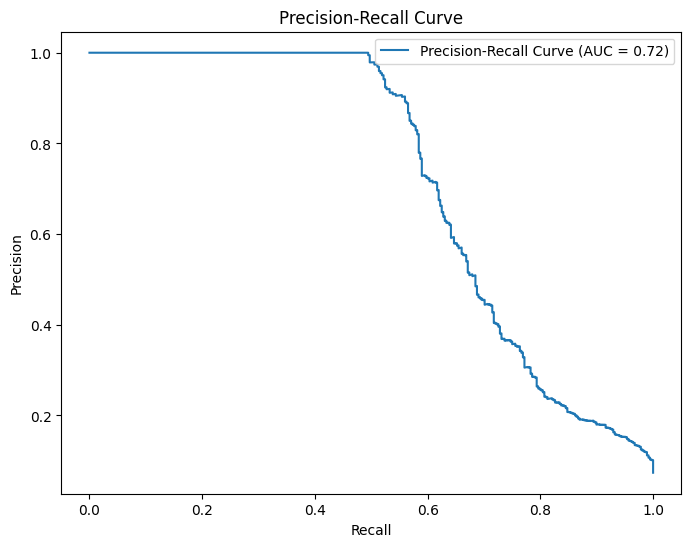

In [59]:
# Plot precision-recall curve

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

I took PR curve over AUC ROC curve due the inherent class imbalance in dataset. PR curve also shows an average performance by the model and its AUC is 0.72. Again the closer it is to 1 the better the model.

# Step 7 - Building model to train and test on the given data using 10 cross-fold validation WITH label encoding of categorical variables

In [60]:
# Dropping the columns based on feature importance results from catboost run

X.drop(columns = ['Var198', 'Var217', 'Var220', 'Var222'], axis = 1, inplace = True)

In [61]:
# replacing -1 category with 0 as binary classifer will expect [0, 1] instead of [-1, 1]

y.replace(-1, 0, inplace=True)

In [62]:
y.value_counts()

output
0    46328
1     3672
Name: count, dtype: int64

In [63]:
#Splitting train and test in stratified format

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.25)

In [64]:
X.describe(include = 'object')

,Var192,Var193,Var195,Var197,Var199,Var202,Var204,Var205,Var206,Var207,Var211,Var212,Var216,Var218,Var219,Var221,Var223,Var226,Var227,Var228
count,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000,50000
unique,362,51,23,226,5074,5714,100,4,22,14,2,81,2016,3,23,7,5,23,7,30
top,qFpmfo8zhV,RO12,taul,0Xwj,r83_sZi,nyZz,RVjC,VpdQ,IYzP,me75fM6ugJ,L84s,NhsEn4L,mAjbk_S,cJvF,FzaX,oslk,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
freq,385,35964,47958,4629,955,198,1819,31962,17274,35079,40299,29303,4937,25319,40304,37009,36608,8031,35156,32703


In [65]:
X.select_dtypes(include = 'object').columns

Index(['Var192', 'Var193', 'Var195', 'Var197', 'Var199', 'Var202', 'Var204',
       'Var205', 'Var206', 'Var207', 'Var211', 'Var212', 'Var216', 'Var218',
       'Var219', 'Var221', 'Var223', 'Var226', 'Var227', 'Var228'],
      dtype='object')

In [66]:
# Storing revised list of categorical features

categorical_features_new = ['Var192', 'Var193', 'Var195', 'Var197', 'Var199', 'Var202', 'Var204','Var205', 'Var206', 'Var207', 'Var211', 'Var212', 'Var216', 'Var218', 'Var219', 'Var221', 'Var223', 'Var226', 'Var227', 'Var228']

In [67]:
!pip install category_encoders

*Leveraging 'Weight of Evidence' (WOE) as encoder to transform the categorical variables. I chose this technique since many feature have high cardinality*

In [68]:
# Creating Target Encoding of the categorical vars
import category_encoders
from category_encoders.woe import WOEEncoder
import numpy as np

WOE_encoder = WOEEncoder(cols=categorical_features_new,
                         drop_invariant=False, # boolean for whether or not to drop columns with 0 variance
                         return_df=True,
                         handle_unknown='value', # handle unknown values at fit time
                         handle_missing='value', # handle missing values at fit time
                         random_state=42,
                         randomized=False,
                         sigma=0.05, # standard deviation (spread or “width”) of the normal distribution.
                         regularization=1.0) # prevent division by zero

# Applying categorical feature encoding using WoE

X_train_woe = WOE_encoder.fit_transform(X_train, y_train)
X_test_woe = WOE_encoder.transform(X_test)

In [69]:
# Replacing NaN with 0 in both train and test set

X_train_woe.fillna(0, inplace = True)
X_test_woe.fillna(0, inplace = True)

In [70]:
# Removing rows containing Infinity from training set

train_nan_rows = X_train_woe.index[np.isinf(X_train_woe[categorical_features_new]).any(axis=1)]

X_train_woe.drop(train_nan_rows, axis = 0, inplace = True)

y_train.drop(train_nan_rows, axis = 0, inplace = True)

In [71]:
# Removing rows containing Infinity from test set

test_nan_rows = X_test_woe.index[np.isinf(X_test_woe[categorical_features_new]).any(axis=1)]

X_test_woe.drop(test_nan_rows, axis = 0, inplace = True)

y_test.drop(test_nan_rows, axis = 0, inplace = True)

*Leveraging correlation values to drop features which are highly correlated but one*

In [72]:
# Dropping highly correlstred variables while retaining the first

def correlation_df(data, thresh):
    col_corr = set()  # creating a set of all correlated columns
    corr_matrix = data.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j] > thresh): # taking just the absolute value to check against threshold
                colname = corr_matrix.columns[i] # getting the name of correlated column
                col_corr.add(colname)
        return col_corr

X_train_woe.drop(correlation_df(X_train_woe, 0.8), axis = 1, inplace = True)
X_test_woe.drop(correlation_df(X_train_woe, 0.8), axis = 1, inplace = True)

*Normalizing the data using standard scaler as columns contain varied range of numbers*

In [73]:
# Calling standard scaler class to normalize the data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

cols = X_train_woe.columns

# Normalizing the values across all columns
X_train_woe_scaled = pd.DataFrame(sc.fit_transform(X_train_woe.values), columns = cols)
X_test_woe_scaled = pd.DataFrame(sc.transform(X_test_woe.values), columns = cols)

In [74]:
y_train.value_counts()

output
0    34746
1     2754
Name: count, dtype: int64

*Utilizing SMOTE + TOMEK for generating synthetic data to augment the minority class*

In [75]:
!pip install imblearn

In [76]:
#!pip uninstall scikit-learn --yes
#!pip install scikit-learn==1.2.2

In [77]:
# Leveraging synthetic data generation to augment the minority class

import imblearn
from imblearn.combine import SMOTEENN, SMOTETomek

In [78]:
# SMOTETomek is a hybrid technique that involves both undersampling and oversampling

oversample = SMOTETomek()
X_train_woe_scaled, y_train = oversample.fit_resample(X_train_woe_scaled, y_train)

In [79]:
y_train.value_counts()

output
0    34745
1    34745
Name: count, dtype: int64

In [80]:
X_train_woe_scaled.shape

(69490, 56)

# Using XGBoost Classifier

In [81]:
from xgboost import XGBClassifier

In [82]:
skf.get_n_splits(X_train_woe_scaled, y_train)

# gets us 10 splits as part of K-fold

for i, (train_index, validation_index) in enumerate(skf.split(X_train_woe_scaled, y_train)):

    # splitting train test for 10 stratified folds
    X_train_xgb, X_validation, y_train_xgb, y_validation = X_train_woe_scaled.iloc[train_index], X_train_woe_scaled.iloc[validation_index], y_train.iloc[train_index], y_train.iloc[validation_index]


   # model instance
    model_xgb = XGBClassifier(n_estimators=100,
                              max_depth=5,
                              learning_rate=0.05,
                              reg_lambda = 0.7,
                              objective='binary:logistic',
                              eval_metric = 'auc',
                              early_stopping_rounds=10)

    model_xgb.fit(X_train_xgb, y_train_xgb, eval_set=[(X_test_woe_scaled, y_test)], verbose = False)

    # prediting on validation set
    y_pred=model_xgb.predict(X_validation)

    # Calculate the accuracy on validation set
    accuracy=accuracy_score(y_pred, y_validation)
    print('\n')
    print('k-fold count: {0:0}'.format(i) )
    print('XGBoost Model validation accuracy score: {0:0.4f}'.format(accuracy))

    # Calculate the accuracy on train set to detect overfitting
    y_pred_train = model_xgb.predict(X_train_xgb)
    print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_xgb, y_pred_train)))



k-fold count: 0
XGBoost Model validation accuracy score: 0.8328
Training-set accuracy score: 0.9788


k-fold count: 1
XGBoost Model validation accuracy score: 0.9719
Training-set accuracy score: 0.9606


k-fold count: 2
XGBoost Model validation accuracy score: 0.9706
Training-set accuracy score: 0.9621


k-fold count: 3
XGBoost Model validation accuracy score: 0.9715
Training-set accuracy score: 0.9614


k-fold count: 4
XGBoost Model validation accuracy score: 0.9702
Training-set accuracy score: 0.9609


k-fold count: 5
XGBoost Model validation accuracy score: 0.9714
Training-set accuracy score: 0.9609


k-fold count: 6
XGBoost Model validation accuracy score: 0.9673
Training-set accuracy score: 0.9610


k-fold count: 7
XGBoost Model validation accuracy score: 0.9702
Training-set accuracy score: 0.9609


k-fold count: 8
XGBoost Model validation accuracy score: 0.9718
Training-set accuracy score: 0.9606


k-fold count: 9
XGBoost Model validation accuracy score: 0.9718
Training-set acc

In [83]:
# prediting on test set
y_pred_test=model_xgb.predict(X_test_woe_scaled)

# Calculate the accuracy on test set
accuracy_score(y_pred_test, y_test)

0.93712

XGBoost seems to perform worse than CatBoost even after imbalance class treatment.

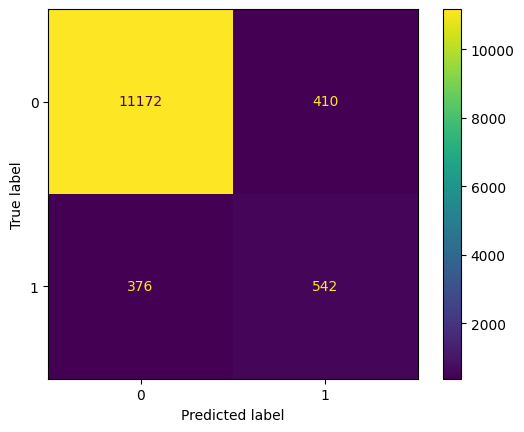

In [84]:
# Plotting confusion matrix to determine class level prediction accuracy

confusion_matrix_xgb = metrics.confusion_matrix(y_test, y_pred_test)
cm_display_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_xgb, display_labels = [0, 1])
cm_display_xgb.plot()
plt.show()

In [85]:
# Calculate precision, recall, and F1 score

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     11582
           1       0.57      0.59      0.58       918

    accuracy                           0.94     12500
   macro avg       0.77      0.78      0.77     12500
weighted avg       0.94      0.94      0.94     12500



XGBoost performs orse than CatBoost on minority class although with the help of synthetic data augmentation we have nearly three times the support.

F1 score is skewed towards the majority class and therefore not the best model.

In [86]:
# Predict probabilities for positive class
y_scores_xgb = model_xgb.predict_proba(X_test_woe_scaled)[:, 1]
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_xgb)
# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score_xgb = auc(recall, precision)

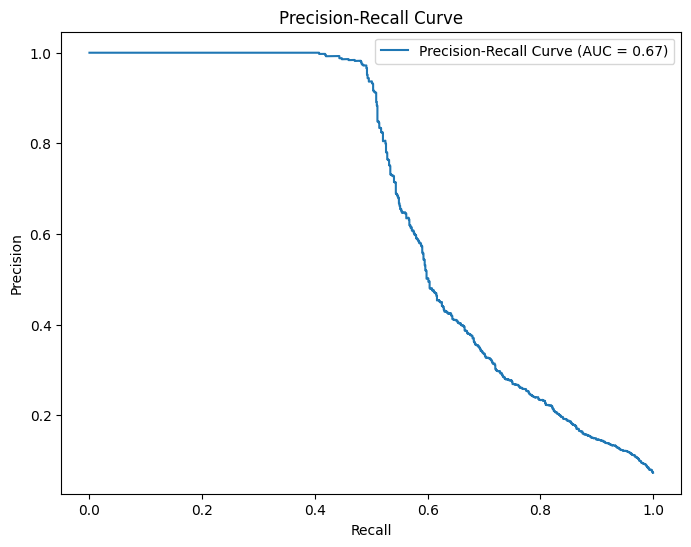

In [87]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score_xgb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

PR curve shows poor performance again by the model owing to inability to predict the minority class correctly in most of the test instances

# Using LightGBM

In [88]:
import lightgbm as lgb

# Create an SGDClassifier object
clf = lgb.LGBMClassifier()


skf.get_n_splits(X_train_woe_scaled, y_train)

# gets us 10 splits as part of K-fold
for i, (train_index, validation_index) in enumerate(skf.split(X_train_woe_scaled, y_train)):

    # splitting train test for 10 stratified folds
    X_train_sgd, X_validation, y_train_sgd, y_validation = X_train_woe_scaled.iloc[train_index], X_train_woe_scaled.iloc[validation_index], y_train.iloc[train_index], y_train.iloc[validation_index]

    clf.fit(X_train_sgd, y_train_sgd)

    # prediting on validation set
    y_pred=clf.predict(X_validation)

    # Calculate the accuracy on validation set
    accuracy=accuracy_score(y_pred, y_validation)
    print('\n')
    print('k-fold count: {0:0}'.format(i) )
    print('LightGBM Model validation accuracy score: {0:0.4f}'.format(accuracy))

    # Calculate the accuracy on train set to detect overfitting
    y_pred_train = clf.predict(X_train_sgd)
    print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_sgd, y_pred_train)))

[LightGBM] [Info] Number of positive: 31271, number of negative: 31270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14162
[LightGBM] [Info] Number of data points in the train set: 62541, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000032
[LightGBM] [Info] Start training from score 0.000032


k-fold count: 0
LightGBM Model validation accuracy score: 0.7529
Training-set accuracy score: 0.9999
[LightGBM] [Info] Number of positive: 31271, number of negative: 31270
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 14136
[LightGB

In [89]:
# prediting on test set
y_pred_test=clf.predict(X_test_woe_scaled)

# Calculate the accuracy on test set
accuracy_score(y_pred_test, y_test)

0.95752

LGBM Classifier seems to perform better than XGBoost and CatBoost models.

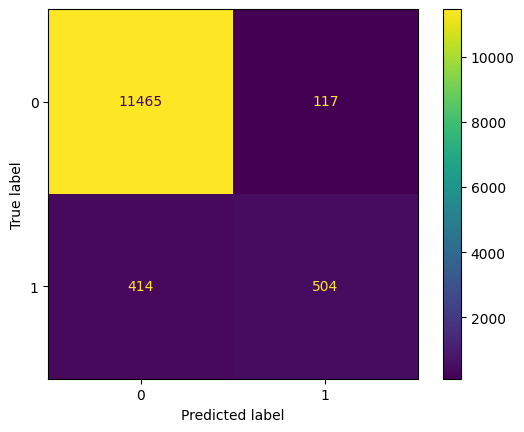

In [90]:
# Plotting confusion matrix to determine class level prediction accuracy

confusion_matrix_lgbm = metrics.confusion_matrix(y_test, y_pred_test)
cm_display_lgbm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lgbm, display_labels = [0, 1])
cm_display_lgbm.plot()
plt.show()

In [91]:
# Calculate precision, recall, and F1 score

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11582
           1       0.81      0.55      0.65       918

    accuracy                           0.96     12500
   macro avg       0.89      0.77      0.82     12500
weighted avg       0.95      0.96      0.95     12500



Even LGMB fails to perform on minortiy class prediction.

In [92]:
# Predict probabilities for positive class
y_scores_xgb = clf.predict_proba(X_test_woe_scaled)[:, 1]
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores_xgb)
# Calculate Area Under the Curve (AUC) for precision-recall curve
auc_score_lgbm = auc(recall, precision)

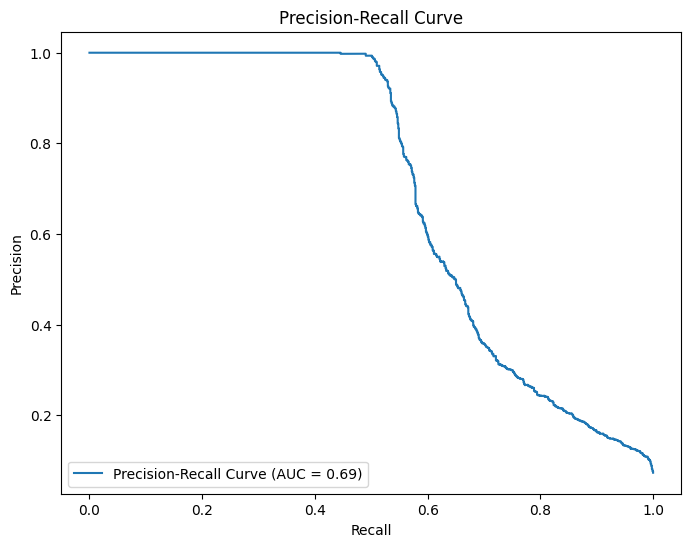

In [93]:
# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_score_lgbm:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

PR Curve is marginally better than XGBoost but still not a good overall performance

# Step 8 - Ideas for further improvement in future

In [94]:
# Understanding of feature variables via a data dictionary can help in picking and transforming columns
# Categorical Column values seem to have been encrypted and is difficult to make a sense of
# Use Gridsearch to fine tune the model parameters for better results
# High cardinal feature variables can be bucketed to make separate categories for ease of modelling
# Further feature engineering can be carried out to create more features from existing ones
# Use ensemble of models to get best average prediction of all
# Code can be modularized and created in a pipeline except the EDA part for ease of execution